In [1]:
#Data Download
#https://drive.google.com/file/d/1Rn11Q4pPgdd6Y9K5FCYrbRggGOldYVCQ/view?usp=sharing

Mounted at /content/drive


In [3]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, auc, roc_auc_score
#import scikitplot as skplt

In [ ]:
#!conda --version

In [ ]:
#!pip install -q condacolab
#import condacolab
#condacolab.install()

In [5]:
#!conda install -c conda-forge scikit-plot -y

/bin/bash: conda: command not found


In [ ]:
pwd

'/Users/noordeen/Documents/Inceptez/Batch16/MLFlow/CreditCardFraud - MLFlow'

In [5]:
cd drive/MyDrive/Inceptez\ Batch\ 16/12.\ Hackathon\ -\ Credit\ card\ Fraud/Credit\ Card\ Fraud\ Detection

/content/drive/MyDrive/Inceptez Batch 16/12. Hackathon - Credit card Fraud/Credit Card Fraud Detection


In [6]:
data = pd.read_csv("creditcard.csv")

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data.shape


(284807, 31)

In [9]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [13]:
data.duplicated().sum()

1081

In [14]:
data.drop_duplicates(inplace = True)

In [15]:
data = data.reset_index(drop=True)

In [16]:
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,0.031068,-0.248536,0.125500,-0.065958,-0.100316,-0.184392,0.011286,-0.073819,0.090305,0.029537,-0.051022,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,0.000815,0.001028,-0.001524,-0.000568,-0.002663,-0.000602,-0.003345,-0.003491,-0.003535,0.000919,-0.001393,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,0.000620,-0.000633,0.002266,0.000680,0.002711,0.001538,0.004013,0.003244,0.002477,-0.000358,-0.001287,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,-0.009632,0.002339,-0.005900,0.000113,-0.003027,-0.001230,-0.004430,-0.008159,-0.003495,-0.000016,-0.002269,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,0.002753,-0.001223,0.003366,0.000177,0.002801,0.000572,0.003346,0.003655,0.002325,-0.000560,0.000318,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,-0.006050,0.000411,-0.002342,0.000019,-0.001000,-0.001171,-0.002373,-0.004466,-0.002685,0.000436,-0.001185,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,-0.002180,-0.000211,-0.001185,0.000397,0.000184,-0.000470,0.000122,-0.001716,0.000541,0.000106,-0.000181,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,-0.013617,0.002454,-0.006153,-0.000170,-0.003816,-0.001394,-0.005944,-0.008794,-0.004279,0.000846,-0.001192,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,0.000481,0.004688,-0.004414,-0.001381,-0.008387,0.001044,-0.004376,-0.005576,-0.001323,-0.000626,0.000271,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,-0.012613,-0.000217,-0.002385,0.000745,0.001981,-0.000283,-0.000086,-0.002318,-0.000373,0.000247,-0.001838,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


In [17]:
matplotlib.rcParams["figure.figsize"] = (30,20)

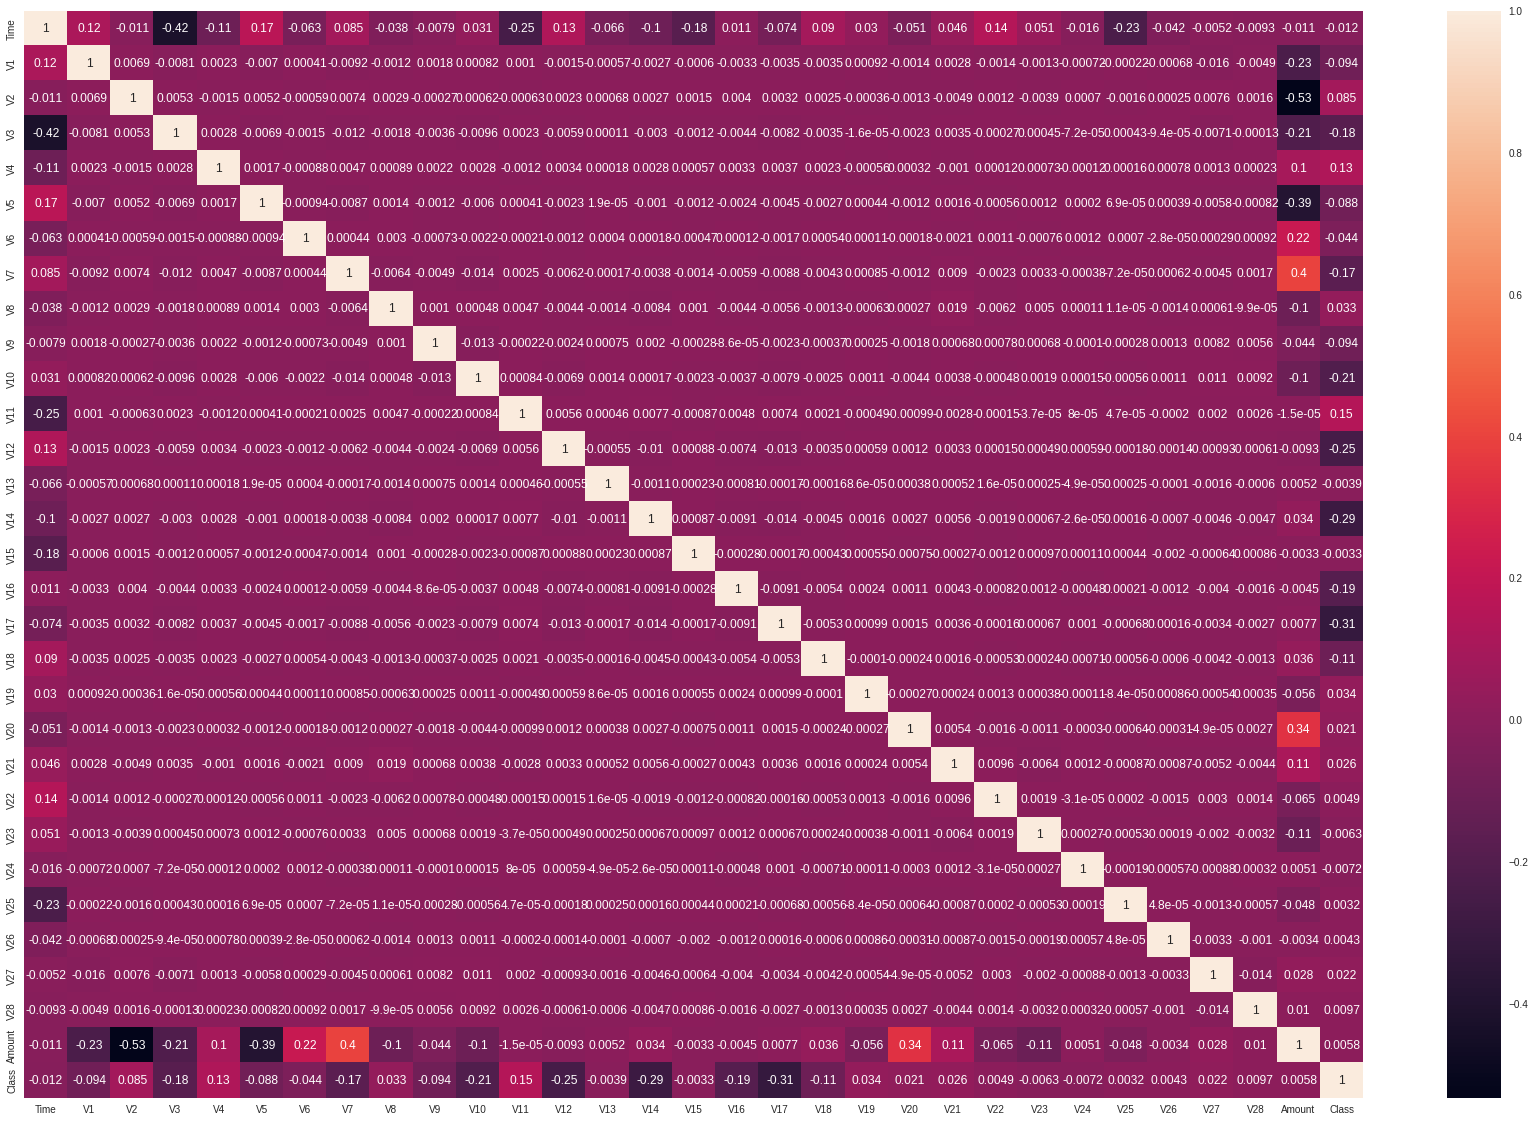

In [18]:
sns.heatmap(data.corr(), annot=True,)

In [19]:
matplotlib.rcParams["figure.figsize"] = (30,20)

In [20]:
trans = MinMaxScaler()

In [21]:
data_scale = pd.DataFrame(trans.fit_transform(data.drop(columns="Class")),columns=data.drop(columns="Class").columns)

In [22]:
data_scale = pd.concat([data_scale,data.Class], axis = 1)

In [23]:
data_scale

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,0.252484,0.680908,0.371591,0.635591,0.446084,0.434392,0.737173,0.655066,0.594863,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,0.381188,0.744342,0.486190,0.641219,0.383840,0.464105,0.727794,0.640681,0.551930,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,0.322422,0.706683,0.503854,0.640473,0.511697,0.357443,0.763381,0.644945,0.386683,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,0.271817,0.710910,0.487635,0.636372,0.289124,0.415653,0.711253,0.788492,0.467058,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,0.236355,0.724477,0.552509,0.608406,0.349419,0.434995,0.724243,0.650665,0.626060,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,0.999965,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,0.598850,0.190550,0.806406,0.394978,0.801627,0.267218,0.484577,0.789000,0.688412,0.509985,0.595979,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030,0
283722,0.999971,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,0.488530,0.276355,0.738709,0.542361,0.623352,0.423414,0.426717,0.730383,0.569303,0.442620,0.580900,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965,0
283723,0.999977,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,0.498692,0.309763,0.706572,0.434111,0.628885,0.435700,0.453827,0.740239,0.680504,0.518236,0.580280,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642,0
283724,0.999977,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,0.500464,0.170288,0.667901,0.367667,0.661171,0.483042,0.429998,0.745946,0.729908,0.789612,0.581622,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389,0


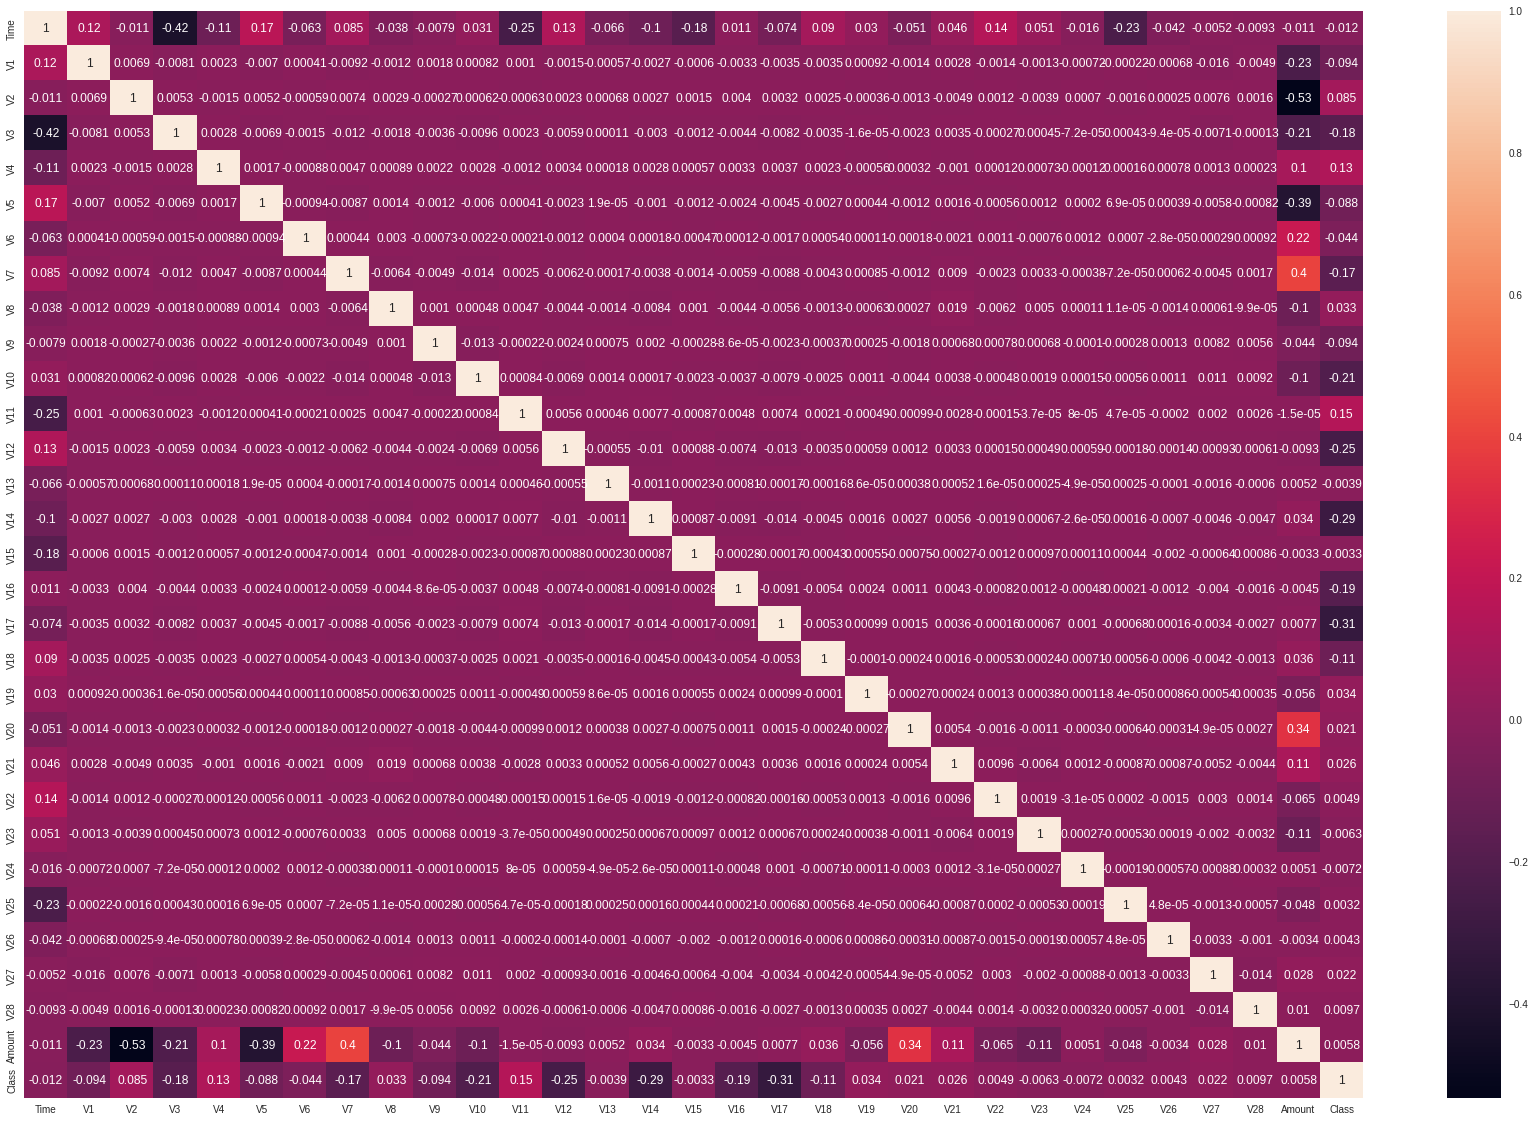

In [24]:
sns.heatmap(data_scale.corr(), annot=True,)

In [25]:
data.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

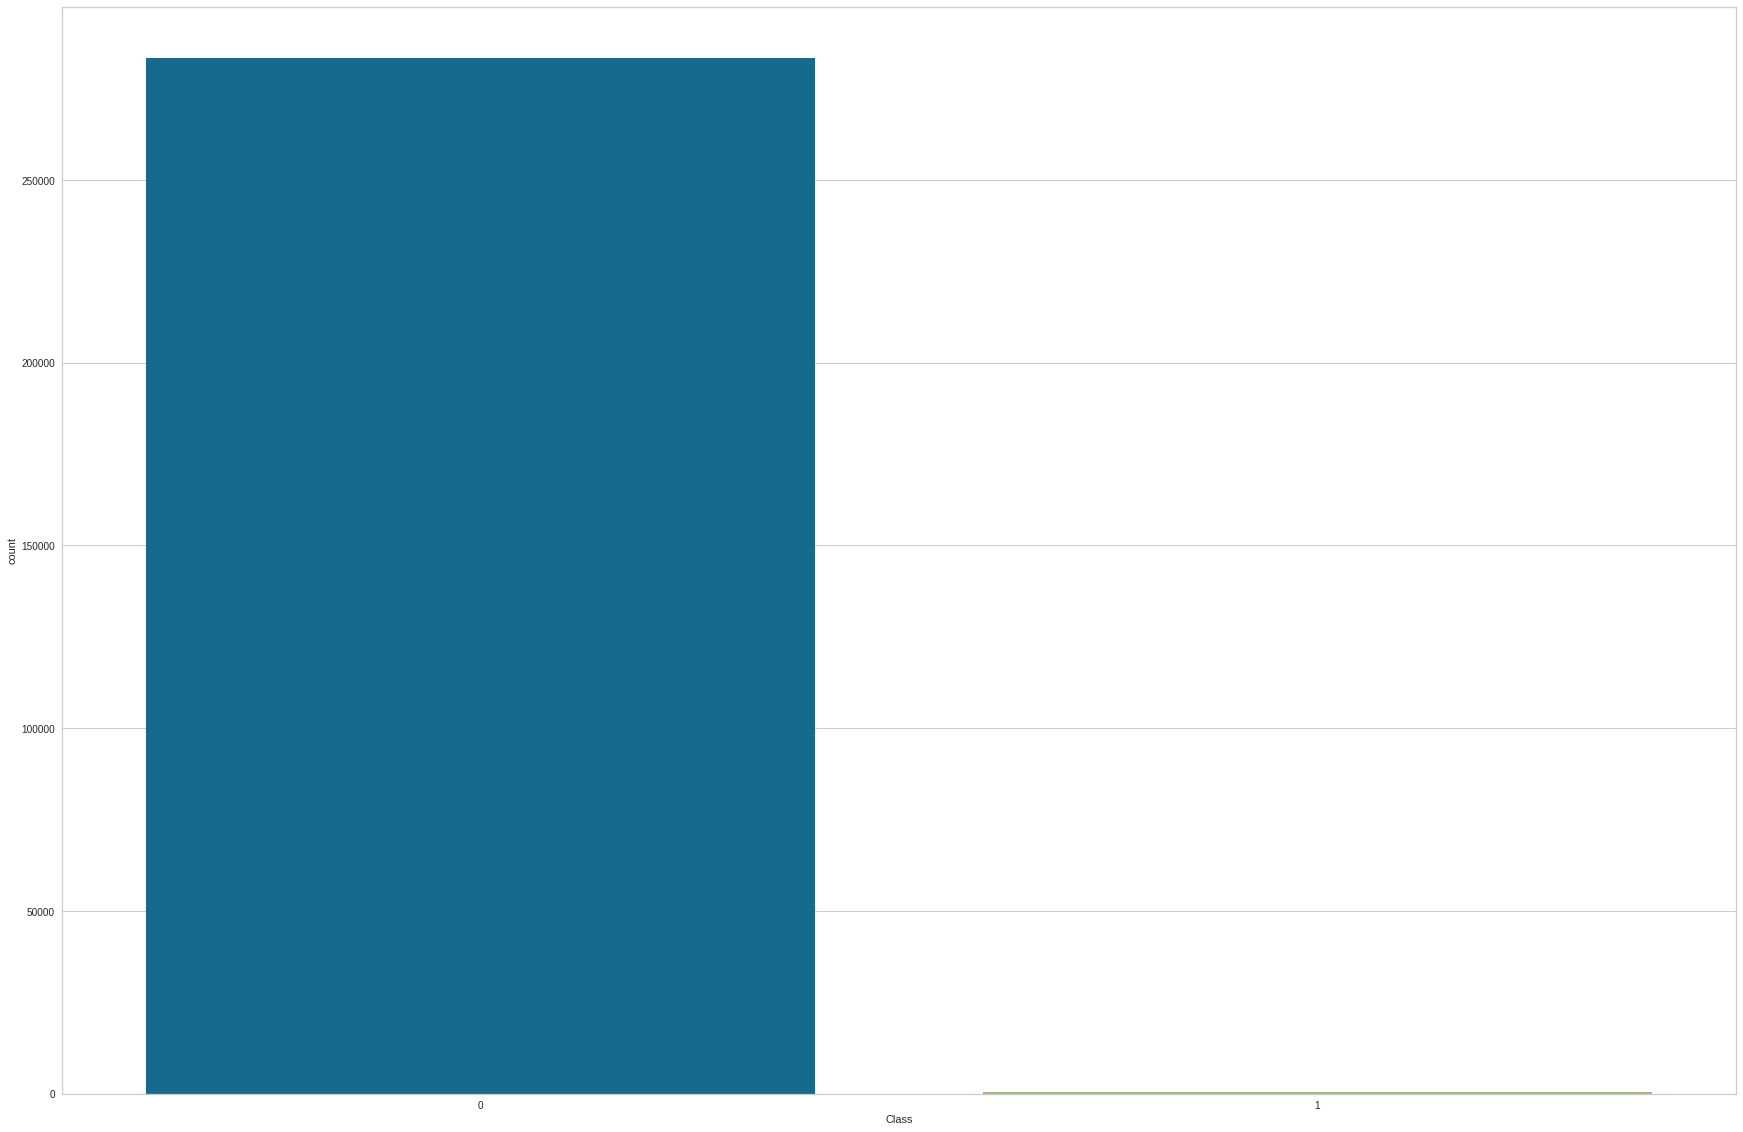

In [26]:
sns.countplot(data.Class)

In [27]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
import imblearn

In [29]:
from imblearn.under_sampling import NearMiss

In [30]:
nm = NearMiss()

In [31]:
X_under, y_under = nm.fit_resample(data_scale.drop(columns='Class'), data_scale['Class'])

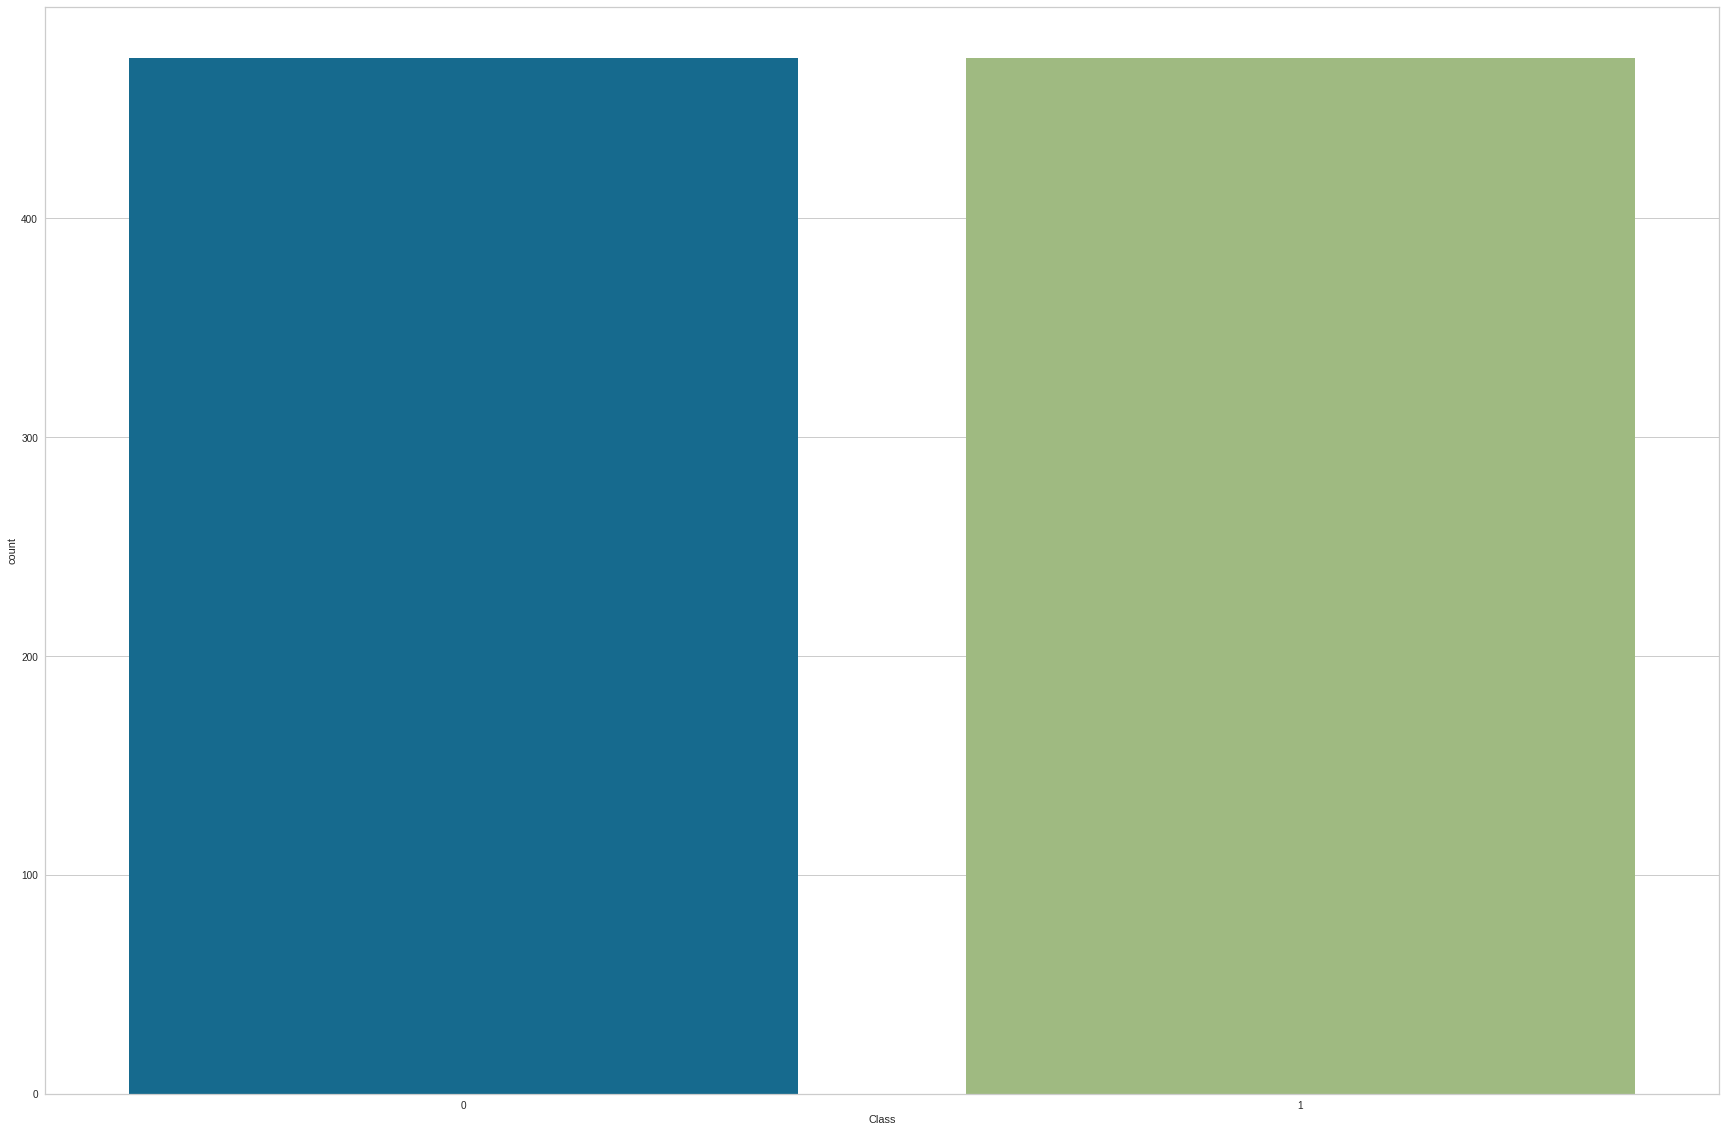

In [32]:
sns.countplot(y_under)

In [33]:
data_undersampled_nearmiss = pd.concat([X_under, y_under], axis = 1)

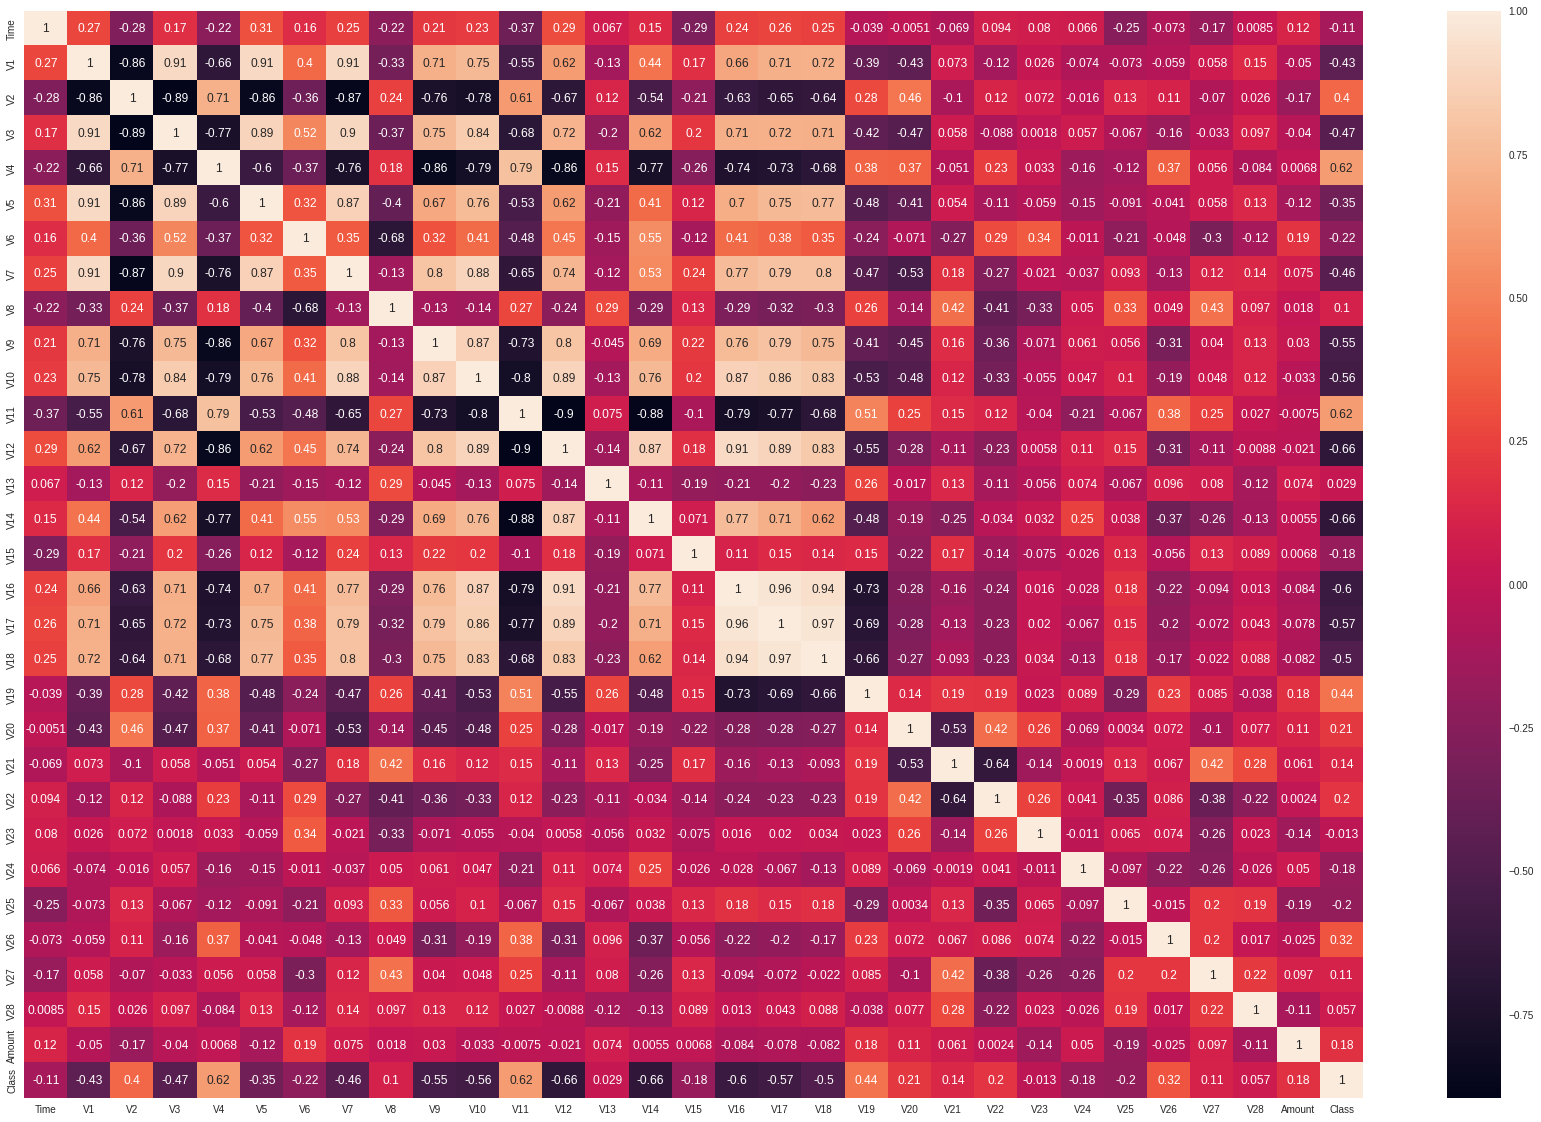

In [34]:
sns.heatmap(data_undersampled_nearmiss.corr(), annot=True,)

In [35]:
from imblearn.under_sampling import RandomUnderSampler

In [36]:
nm = RandomUnderSampler()

In [37]:
X_under, y_under = nm.fit_resample(data_scale.drop(columns='Class'), data_scale['Class'])

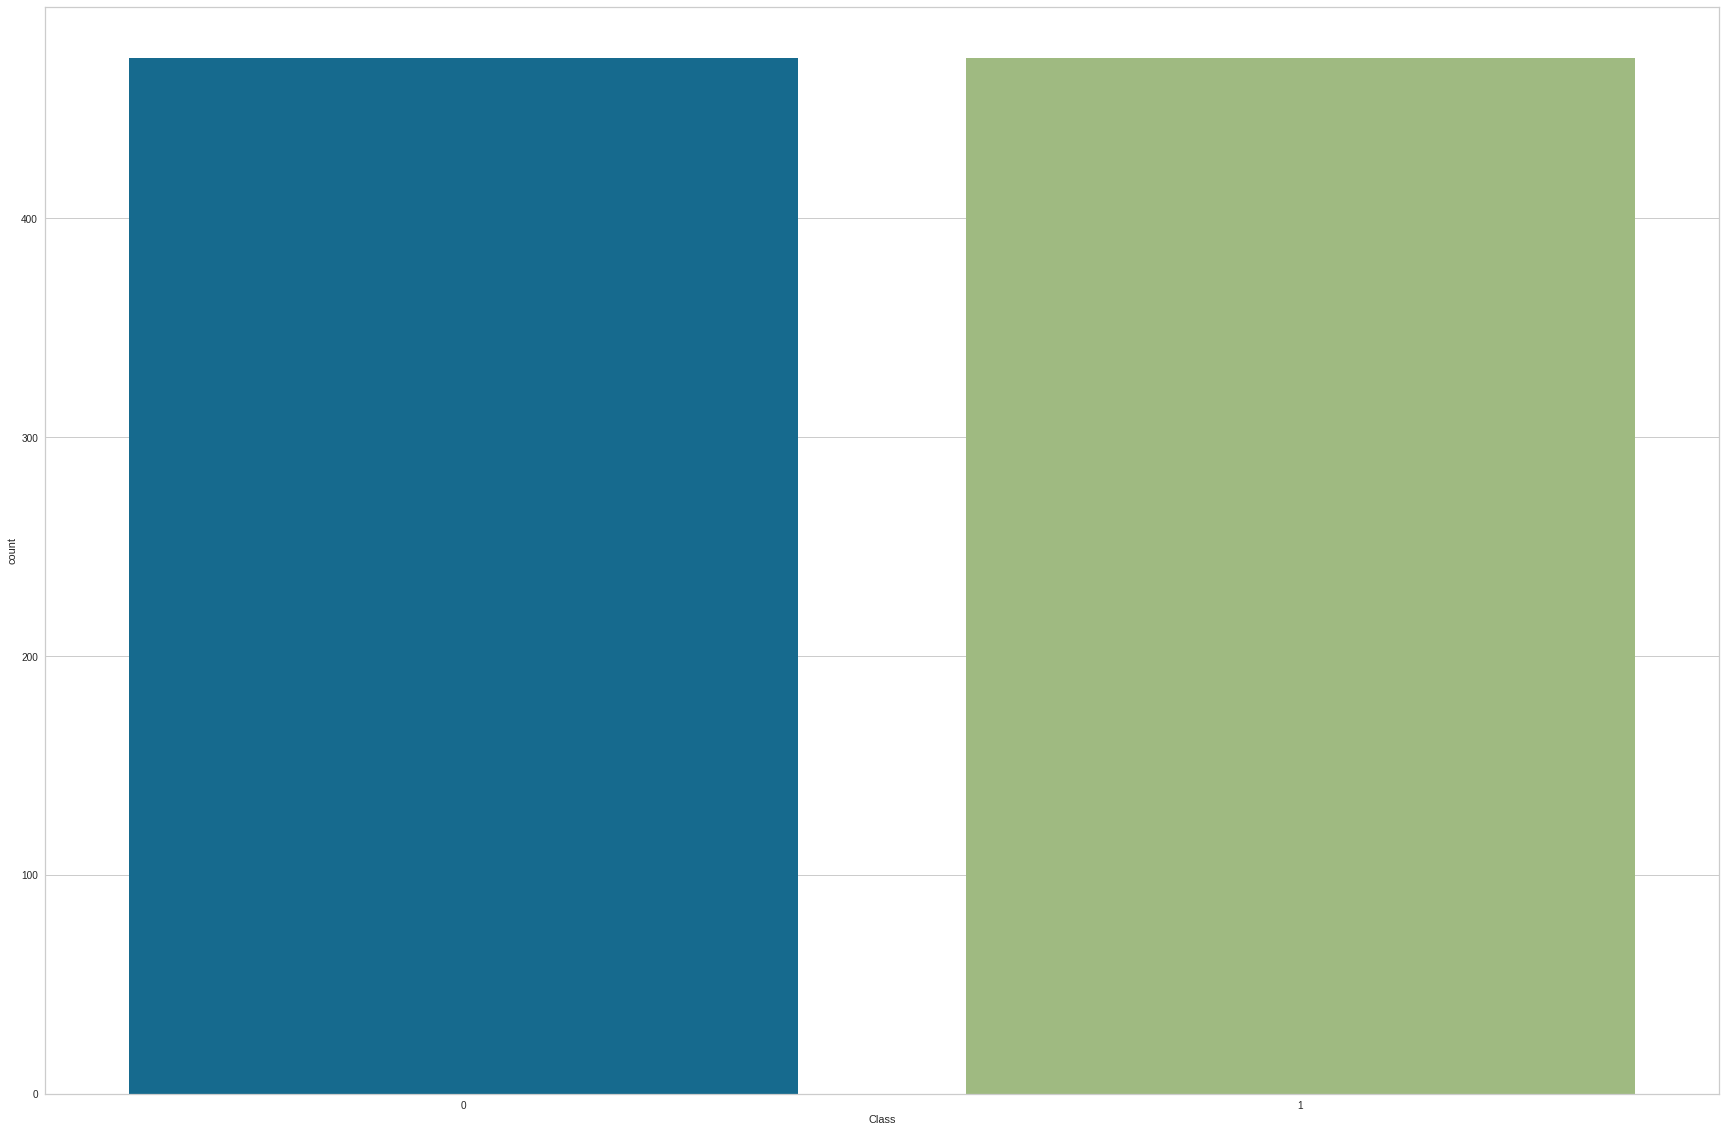

In [38]:
sns.countplot(y_under)

In [39]:
data_undersampled_randam_sample = pd.concat([X_under, y_under], axis = 1)

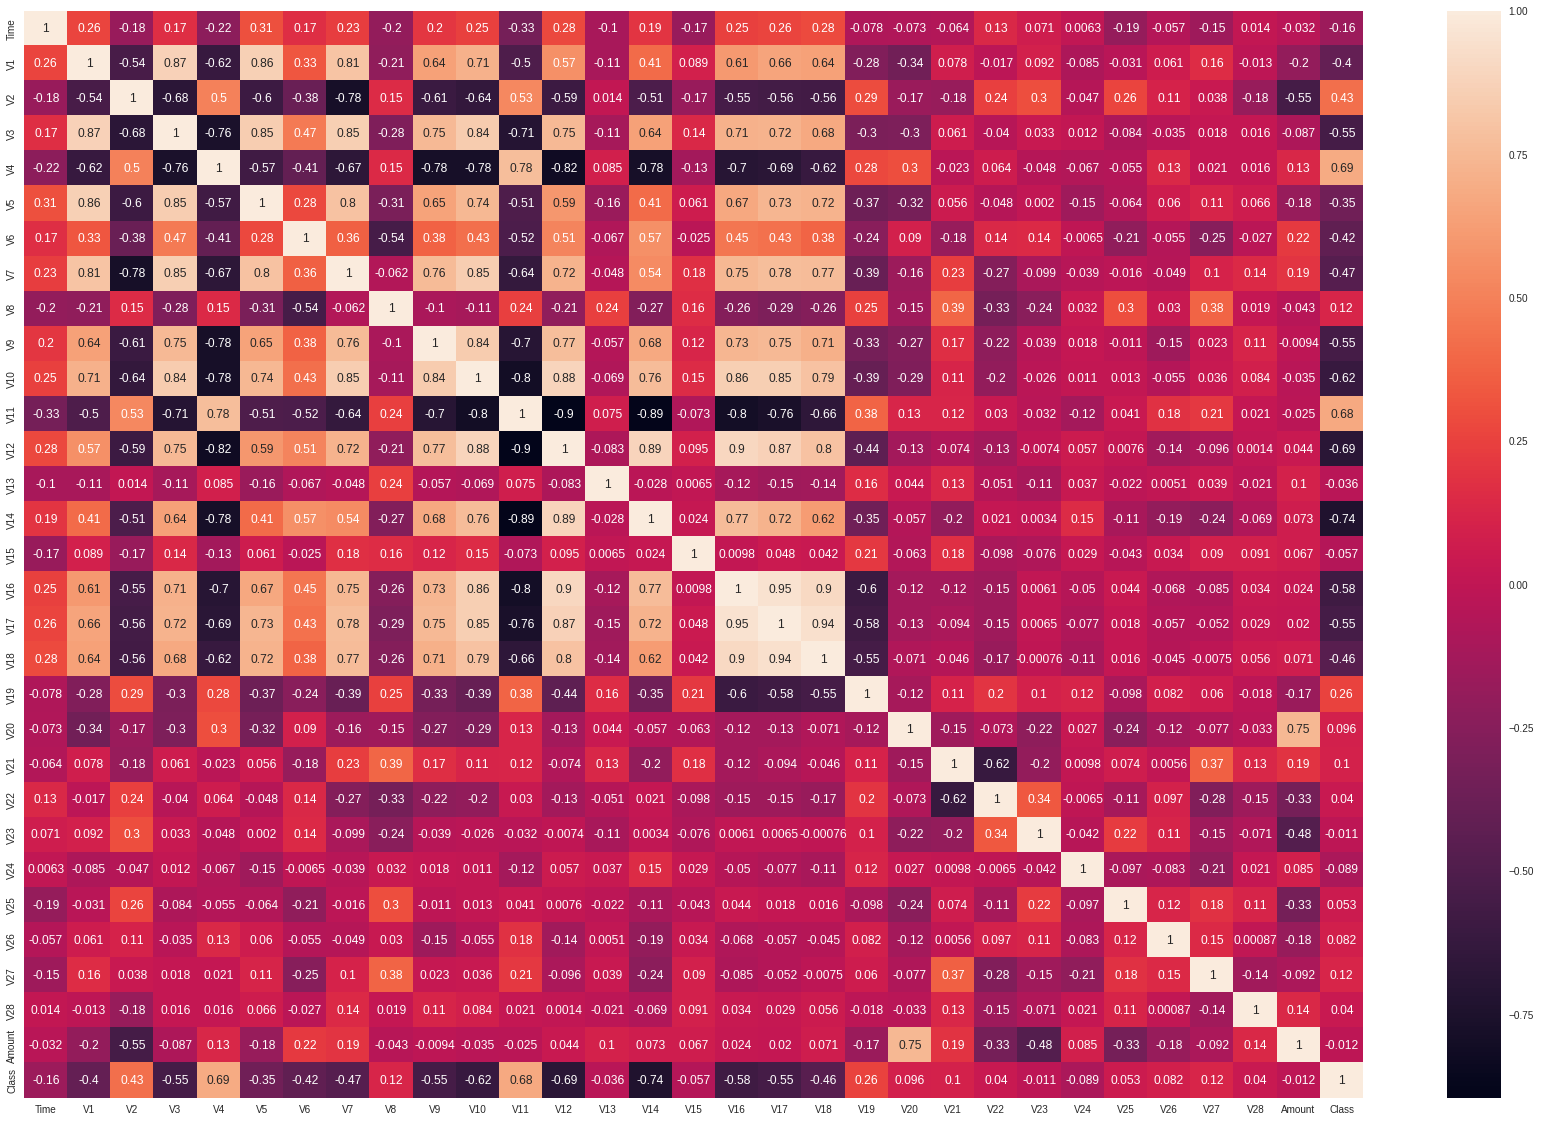

In [40]:
sns.heatmap(data_undersampled_randam_sample.corr(), annot=True,)

In [41]:
data_undersampled_nearmiss

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.151726,0.653335,0.884032,0.477973,0.521253,0.675577,0.217446,0.172828,0.915192,0.324061,0.322155,0.646282,0.381268,0.448184,0.333313,0.337807,0.215543,0.326577,0.310213,0.668555,0.598504,0.590450,0.450521,0.654963,0.395984,0.644001,0.386452,0.445203,0.324243,0.000039,0
1,0.159290,0.506054,0.923901,0.356596,0.535996,0.637636,0.212214,0.149350,0.973896,0.335464,0.341176,0.554328,0.466187,0.524441,0.442559,0.328858,0.265779,0.385888,0.326974,0.626568,0.599857,0.591354,0.417404,0.647462,0.402482,0.683394,0.388692,0.439719,0.322292,0.000039,0
2,0.289753,0.823505,0.834298,0.643704,0.439436,0.726220,0.226788,0.217336,0.846357,0.378752,0.379975,0.466592,0.454813,0.388046,0.385367,0.406282,0.306396,0.514204,0.475724,0.615867,0.590288,0.577141,0.475533,0.663877,0.375055,0.598295,0.380062,0.436793,0.319083,0.000039,0
3,0.239849,0.844611,0.826858,0.661186,0.438752,0.731476,0.227993,0.221479,0.837187,0.376922,0.376637,0.480981,0.441768,0.377258,0.368746,0.408521,0.299208,0.505018,0.473269,0.621601,0.590340,0.577045,0.479715,0.664053,0.374690,0.591443,0.378625,0.437206,0.319632,0.000039,0
4,0.438134,0.885901,0.796901,0.773321,0.420505,0.741661,0.248909,0.235568,0.803450,0.368682,0.392405,0.471071,0.436423,0.457868,0.407002,0.364804,0.218248,0.378702,0.322649,0.762674,0.584411,0.577074,0.508052,0.661656,0.421661,0.583451,0.371218,0.427144,0.330326,0.004278,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,0.978876,0.925541,0.779136,0.759117,0.329475,0.755171,0.242806,0.259977,0.792864,0.391646,0.393113,0.411103,0.500009,0.352724,0.421946,0.366357,0.357196,0.598329,0.562841,0.593862,0.593606,0.574031,0.495141,0.674930,0.342499,0.608078,0.554231,0.421913,0.316127,0.015180,1
942,0.980063,0.981714,0.780863,0.750697,0.314516,0.768696,0.249683,0.256746,0.788051,0.423943,0.441850,0.455267,0.587469,0.386984,0.470870,0.290441,0.380810,0.636201,0.605939,0.620920,0.582673,0.567454,0.511348,0.663271,0.371313,0.607201,0.546239,0.423694,0.316911,0.000030,1
943,0.980086,0.946807,0.779143,0.799053,0.272690,0.758173,0.262986,0.251741,0.798367,0.440311,0.437055,0.392025,0.599602,0.415901,0.509637,0.283054,0.398373,0.584823,0.618422,0.584108,0.582906,0.573599,0.548942,0.668269,0.386556,0.536386,0.502403,0.423619,0.317068,0.003032,1
944,0.983645,0.905394,0.773440,0.743844,0.332480,0.760057,0.233425,0.251904,0.796742,0.406549,0.400185,0.400264,0.514594,0.361058,0.430304,0.346886,0.368274,0.597045,0.551631,0.560544,0.583526,0.570882,0.497472,0.658660,0.357486,0.559486,0.524456,0.432844,0.307976,0.009536,1


In [42]:
data_undersampled_nearmiss.shape

(946, 31)

In [43]:
data_undersampled_nearmiss['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [44]:
data_undersampled_nearmiss = data_undersampled_nearmiss.drop(columns="Time")

In [45]:
X = data_undersampled_nearmiss.drop(columns="Class")
y = data_undersampled_nearmiss["Class"]

In [46]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.3, random_state = 89)

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
model = RandomForestClassifier()
model.fit(train_X,train_y)

RandomForestClassifier()

In [52]:
confusion_matrix(test_y,model.predict(test_X))

array([[143,   5],
       [  9, 127]])

In [53]:
accuracy_score(test_y,model.predict(test_X))

0.9507042253521126

In [54]:
roc_auc_score(test_y,model.predict(test_X))

0.9500198728139905

In [55]:
n_estimators = [25,50,75,100,125,150,200]
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

In [56]:
acc = []
auc = []
est = []
depth = []
for n_est in n_estimators:
    for max_d in max_depth:
        model = RandomForestClassifier(n_estimators=n_est, max_depth=max_d, n_jobs=-1)
        model.fit(train_X, train_y)
        y_pred = model.predict(test_X)
        #print("accuracy = ",accuracy_score(test_y, y_pred))
        #print("ROC score",roc_auc_score(test_y, y_pred))
        est.append(n_est)
        depth.append(max_d)
        acc.append(accuracy_score(test_y, y_pred))
        auc.append(roc_auc_score(test_y, y_pred))
        

In [57]:
res = pd.DataFrame([est,depth,acc,auc]).T

In [58]:
res.columns = ["n_estimator","max_depth","Accuracy","AUC"]

In [59]:
res.sort_values(by="Accuracy", ascending=False)

,n_estimator,max_depth,Accuracy,AUC
53,75.0,14.0,0.957746,0.957373
94,125.0,15.0,0.957746,0.957373
97,125.0,18.0,0.957746,0.957373
75,100.0,16.0,0.957746,0.957373
117,150.0,18.0,0.954225,0.953696
...,...,...,...,...
40,75.0,1.0,0.890845,0.887818
60,100.0,1.0,0.890845,0.887818
1,25.0,2.0,0.890845,0.887818
120,200.0,1.0,0.887324,0.884141


In [61]:
!pip install mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.9 MB 13.5 MB/s 
     |████████████████████████████████| 209 kB 71.6 MB/s 
     |████████████████████████████████| 147 kB 73.3 MB/s 
     |████████████████████████████████| 182 kB 86.1 MB/s 
     |████████████████████████████████| 79 kB 8.9 MB/s 
     |████████████████████████████████| 77 kB 7.4 MB/s 
     |████████████████████████████████| 78 kB 9.4 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
     |████████████████████████████████| 55 kB 4.0 MB/s 
     |████████████████████████████████| 140 kB 70.3 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 60 kB 8.2 MB/s 
  Created wheel for databricks-cli: filename=databricks_cli-0.17.3-py3-none-any.whl size=139102 sha256=74dd1835794053844a4607357956b3b31f61b064160199e1b5eb6d75a653c5a0
  Stored in directory: /root/.cache/pip/wheels/3f/

In [62]:
import mlflow

In [65]:
experiment_id = mlflow.set_experiment("Creditcard Fraud Randomforest").experiment_id

In [66]:
for n_est in n_estimators:
    for max_d in max_depth:
        with mlflow.start_run(experiment_id=experiment_id):
            model = RandomForestClassifier(n_estimators=n_est, max_depth=max_d, n_jobs=-1)
            model.fit(train_X, train_y)
            y_pred = model.predict(test_X)
            acc = accuracy_score(test_y, y_pred)
            roc = roc_auc_score(test_y, y_pred)       
            mlflow.log_param("n_estimators",n_est)
            mlflow.log_param("max_depth",max_d)

            mlflow.log_metric("Accuracy", acc)
            mlflow.log_metric("ROC", roc)

            mlflow.sklearn.log_model(model,"model")


Enter the ngrok authtoken: ··········
MLflow Tracking UI: https://bf6c-34-90-230-63.ngrok.io


In [ ]:
#mlflow.end_run()

In [69]:
data = test_X
import mlflow
logged_model = 'runs:/46b8f62dc3434b2999d8ef308661f049/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(data))

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [ ]:
experiment_id = mlflow.set_experiment("Creditcard Fraud KNN")
k = [1,3,5,7,9,11,13,15,16]
for n_neigh in k:
        with mlflow.start_run(experiment_id=experiment_id):
            
            model = KNeighborsClassifier(n_neighbors=n_neigh)
            model.fit(train_X, train_y)
            y_pred = model.predict(test_X)
            acc = accuracy_score(test_y, y_pred)
            roc = roc_auc_score(test_y, y_pred)       
            mlflow.log_param("n_neighbors",n_neigh)

            mlflow.log_metric("Accuracy", acc)
            mlflow.log_metric("ROC", roc)
            mlflow.log_text("")
            
            mlflow.sklearn.log_model(model,"model")


INFO: 'Creditcard Fraud KNN' does not exist. Creating a new experiment


In [71]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 12.3 MB/s 
     |████████████████████████████████| 1.7 MB 33.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 25.9 MB 64.8 MB/s 
     |████████████████████████████████| 137 kB 64.6 MB/s 
     |████████████████████████████████| 1.3 MB 63.9 MB/s 
     |████████████████████████████████| 10.4 MB 46.2 MB/s 
     |████████████████████████████████| 56 kB 5.6 MB/s 
     |████████████████████████████████| 636 kB 67.9 MB/s 
     |████████████████████████████████| 2.0 MB 44.3 MB/s 
     |████████████████████████████████| 6.8 MB 47.7 MB/s 
     |████████████████████████████████| 3.3 MB 64.8 MB/s 
     |████████████████████████████████| 88 kB 7.9 MB/s 
     |████████████████████████████████

In [76]:
!pip uninstall numba -y

Found existing installation: numba 0.54.1
Uninstalling numba-0.54.1:
  Successfully uninstalled numba-0.54.1


In [77]:
!pip install numba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.5 MB 9.4 MB/s 
     |████████████████████████████████| 34.6 MB 166 kB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.10 requires numba<0.55, but you have numba 0.56.3 which is incompatible.


In [81]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.23.2

Found existing installation: scikit-learn 0.23.2
Uninstalling scikit-learn-0.23.2:
  Successfully uninstalled scikit-learn-0.23.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-0.23.2-cp37-cp37m-manylinux1_x86_64.whl (6.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.10 requires numba<0.55, but you have numba 0.56.3 which is incompatible.


In [48]:
from pycaret.classification import *

In [49]:
clf = setup(data=data_undersampled_nearmiss, target="Class", log_experiment=True, experiment_name="CreditFraud Pycaret")

,Description,Value
0,session_id,1983
1,Target,Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(946, 30)"
5,Missing Values,False
6,Numeric Features,29
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:Logging experiment in MLFlow
2022/10/15 05:32:19 INFO mlflow.tracking.fluent: Experiment with name 'CreditFraud Pycaret' does not exist. Creating a new experiment.
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                        

In [50]:
top_5 = compare_models(n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9410,0.9729,0.9212,0.9596,0.9395,0.8820,0.8836,0.505
gbc,Gradient Boosting Classifier,0.9395,0.9734,0.9212,0.9573,0.9382,0.8790,0.8809,0.311
lightgbm,Light Gradient Boosting Machine,0.9381,0.9758,0.9182,0.9571,0.9364,0.8761,0.8782,0.172
et,Extra Trees Classifier,0.9365,0.9759,0.9152,0.9560,0.9347,0.8730,0.8745,0.446
ada,Ada Boost Classifier,0.9246,0.9578,0.9182,0.9315,0.9237,0.8491,0.8512,0.123
qda,Quadratic Discriminant Analysis,0.9064,0.9430,0.8939,0.9165,0.9048,0.8127,0.8135,0.012
knn,K Neighbors Classifier,0.9033,0.9310,0.8333,0.9677,0.8944,0.8065,0.8154,0.114
nb,Naive Bayes,0.9003,0.9612,0.8242,0.9712,0.8905,0.8005,0.8108,0.011
dt,Decision Tree Classifier,0.8957,0.8956,0.8758,0.9135,0.8932,0.7914,0.7938,0.020
lda,Linear Discriminant Analysis,0.8882,0.9491,0.8152,0.9534,0.8779,0.7763,0.7853,0.013


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1983, verbose=0,
                       warm_start=False), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_sample

In [55]:
for i in top_5:
    print(i)
    tune_model(i)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9403,0.9724,0.9394,0.9394,0.9394,0.8806,0.8806
1,0.9552,0.9866,0.9091,1.0000,0.9524,0.9103,0.9140
2,0.9394,0.9550,0.9091,0.9677,0.9375,0.8788,0.8804
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8636,0.9458,0.7879,0.9286,0.8525,0.7273,0.7358
5,0.8636,0.8999,0.9091,0.8333,0.8696,0.7273,0.7303
6,0.8788,0.9265,0.8485,0.9032,0.8750,0.7576,0.7590
7,0.9545,0.9642,0.9394,0.9688,0.9538,0.9091,0.9095
8,0.9545,0.9734,0.9091,1.0000,0.9524,0.9091,0.9129


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.3,
                   n_estimators=120, random_state=1983)
INFO:logs:tune_model() succesfully completed......................................


In [51]:
!mlflow ui

[2022-10-15 05:34:10 +0000] [5746] [INFO] Starting gunicorn 20.1.0
[2022-10-15 05:34:10 +0000] [5746] [INFO] Listening at: http://127.0.0.1:5000 (5746)
[2022-10-15 05:34:10 +0000] [5746] [INFO] Using worker: sync
[2022-10-15 05:34:10 +0000] [5749] [INFO] Booting worker with pid: 5749
[2022-10-15 05:34:22 +0000] [5746] [INFO] Handling signal: int

Aborted!
[2022-10-15 05:34:23 +0000] [5749] [INFO] Worker exiting (pid: 5749)
[2022-10-15 05:34:23 +0000] [5746] [INFO] Shutting down: Master


In [ ]:
!pip install mlflow --quiet
get_ipython().system_raw("mlflow ui --port 5000 &")


In [ ]:
!pip install pyngrok --quiet

from pyngrok import ngrok
from getpass import getpass

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = getpass('Enter the ngrok authtoken: ')
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)